In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import comb

In [3]:
# 设置matplotlib使用math text
plt.rcParams['axes.formatter.use_mathtext'] = True
# 如果需要更完整的数学字体设置，可以添加：
plt.rcParams['mathtext.fontset'] = 'cm'  # 使用Computer Modern字体
plt.rcParams['font.family'] = 'STIXGeneral'  # 使用STIX字体族

In [4]:
plt.rcParams['font.family']

['STIXGeneral']

In [5]:
plt.rcParams['font.serif'] 

['DejaVu Serif',
 'Bitstream Vera Serif',
 'Computer Modern Roman',
 'New Century Schoolbook',
 'Century Schoolbook L',
 'Utopia',
 'ITC Bookman',
 'Bookman',
 'Nimbus Roman No9 L',
 'Times New Roman',
 'Times',
 'Palatino',
 'Charter',
 'serif']

# NMFT

In [6]:
def generate_data(nd, rc, rfs=np.logspace(-3,0,50)):
    nc = int(nd * rc)
    nfs = (nd * rfs).astype(int)
    ret = []
    for nf in nfs:
        p = 1 - comb(nd-nf,nc) / comb(nd,nc)
        ret.append(p)
    return ret

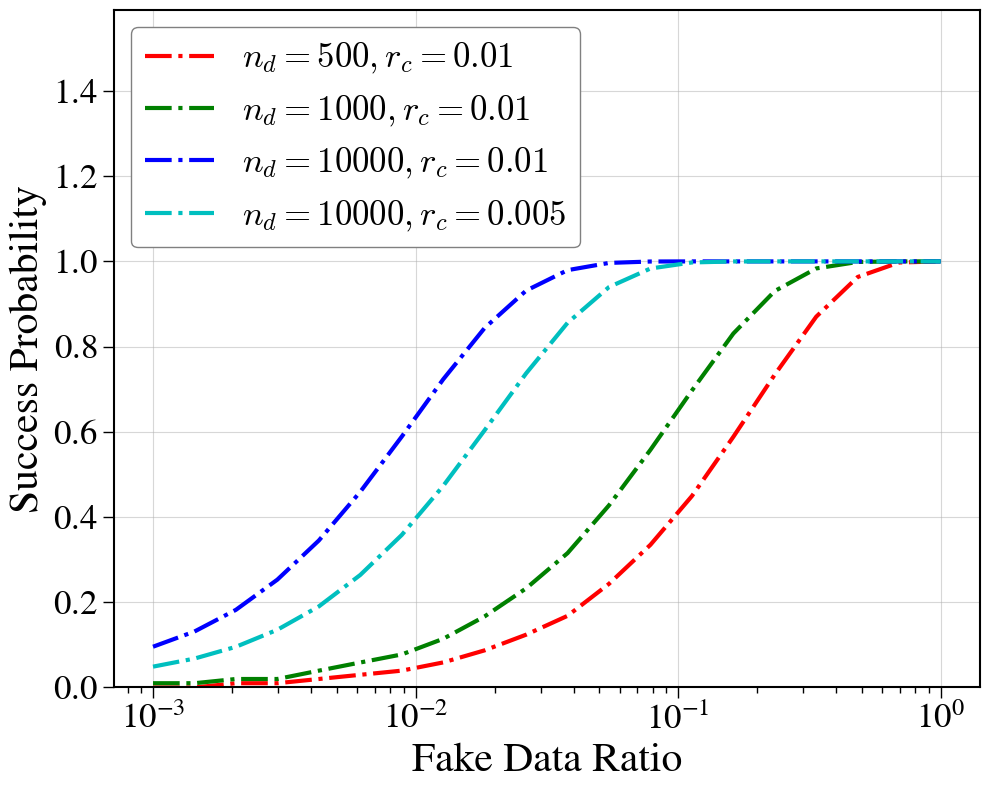

In [9]:
rfs = np.logspace(-3,0,20)
p1 = generate_data(500, 0.01, rfs)
p2 = generate_data(1000, 0.01, rfs)
p3 = generate_data(10000, 0.01, rfs)
p4 = generate_data(10000, 0.005, rfs)
plt.figure(figsize=(10,8))
plt.plot(rfs, p1, '-.', markerfacecolor='none', ms=8, mew=3, lw=3, color='r', label=r'$n_d=500, r_c=0.01$')
plt.plot(rfs, p2, '-.', markerfacecolor='none', ms=8, mew=3, lw=3, color='g', label=r'$n_d=1000, r_c=0.01$')
plt.plot(rfs, p3, '-.', markerfacecolor='none', ms=8, mew=3, lw=3, color='b', label=r'$n_d=10000, r_c=0.01$')
plt.plot(rfs, p4, '-.', markerfacecolor='none', ms=8, mew=3, lw=3, color='c', label=r'$n_d=10000, r_c=0.005$')

# 获取当前坐标轴并设置边框线宽
ax = plt.gca()
[i.set_linewidth(1.5) for i in ax.spines.values()]

# 设置刻度线的长度和宽度
plt.tick_params(axis='both', which='major', length=8, width=1)
plt.tick_params(axis='both', which='minor', length=4, width=1)

plt.legend(loc='upper left', fontsize=25, ncol=1, frameon=True, edgecolor='grey', framealpha=1.0)
plt.xlabel('Fake Data Ratio', fontsize=30)
plt.ylabel('Success Probability', fontsize=30)
plt.xscale('log')
plt.ylim([0,1.59])
plt.yticks(size = 25)
plt.xticks(size = 25)
plt.grid(True, linestyle='-', alpha=0.5)
plt.tight_layout()
plt.savefig('/mnt/d/projects/nmft/figs/fakeattack.pdf', dpi=300)
plt.show()